In [ ]:
# Import necessary libraries to work with in this project

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 10

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mae
from tensorflow.keras.metrics import Mean
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the csv file that is related to apple quality, transform it into a pandas dataframe and take a look at the first five samples

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


# Data Exploration & EDA

In [ ]:
# Gather more detailed information on our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [ ]:
# Calculate the number of columns and rows of our data

print(f"Columns: {df.shape[1]}\nSamples: {df.shape[0]}")

Columns: 9
Samples: 4000


In [ ]:
# Check if there are any missing values within any feature

any(df.isna().sum() > 0)

False

In [ ]:
# Make a statistical description on numerically-based variables

df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [ ]:
# Explore the target variable and calculate the number of samples for every category

df['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

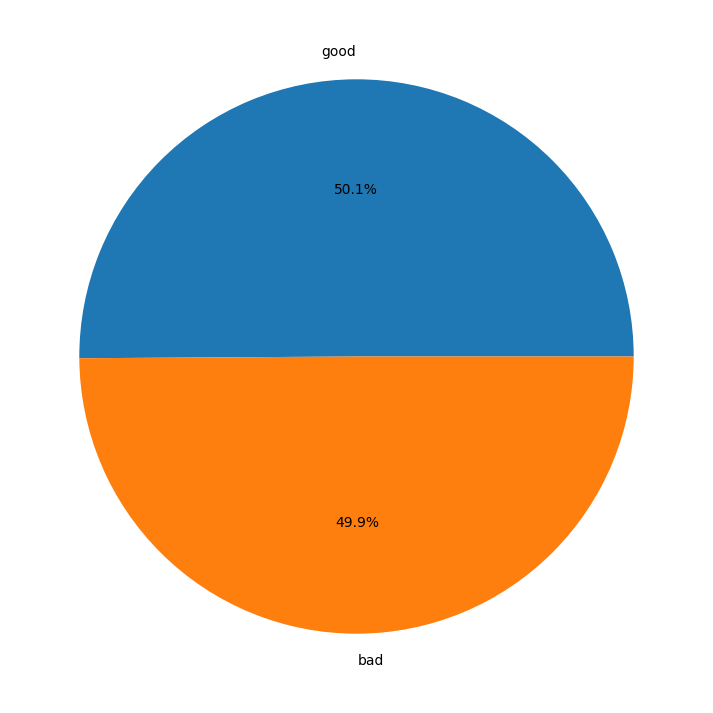

In [ ]:
# Visualize the distribution of the target variable (Quality variable) using a Pie Chart

vc = df['Quality'].value_counts(ascending=False)

plt.pie(x=vc.values, labels=vc.index, autopct='%1.1f%%')
plt.show()

## Correlation

In [ ]:
# Encode Quality variable using a simple mapping method

df.Quality = df.Quality.map({'good':0, 'bad':1})

In [ ]:
# Take a look at our data's variables data types to check if the transformation have been made as we wanted it

df.dtypes

A_id             int64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object

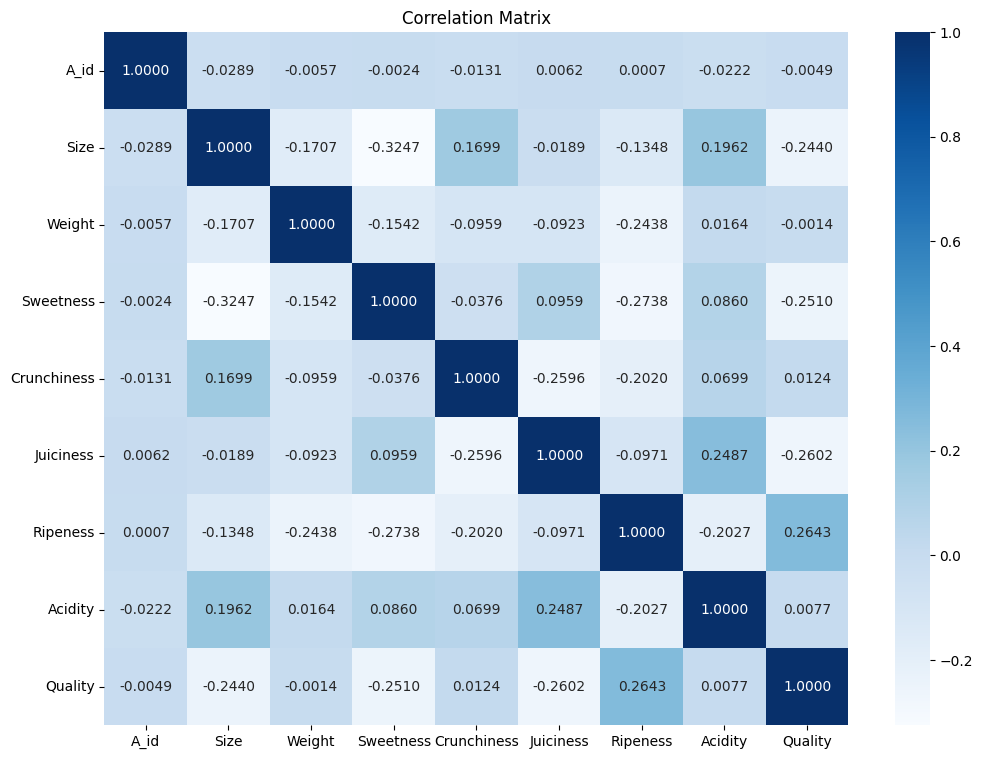

In [ ]:
# Create a heatmap that describes Pearson's Correlation coefficient between all features and tries to find any relationship between them

sns.heatmap(df.corr(), annot=True, fmt='.4f', cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

## Observations and remarks :

* The dataset is balanced.
* The autoencoders only require instances of good samples for training.
* The fraud samples will be used for testing.
* Most correlation values are very close to 0, which indicates that our features are weakly correlated.
* This is where Autoencoders prove to be useful, since they can capture the complex relationships in the data.

## Data Visualization

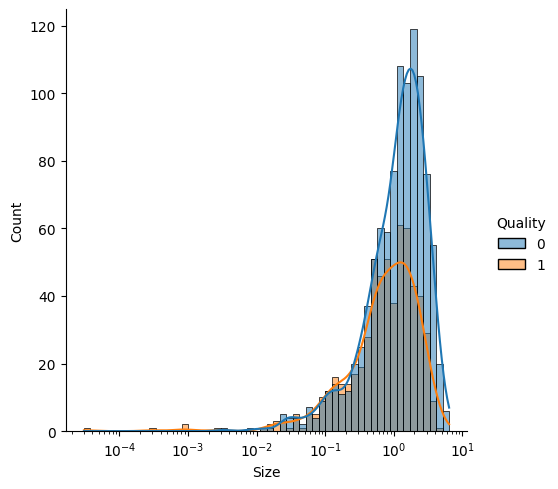

In [ ]:
# Visualize the distribution of Size feature

sns.displot(data=df, x='Size', hue='Quality', log_scale=True, kde=True)
plt.show()

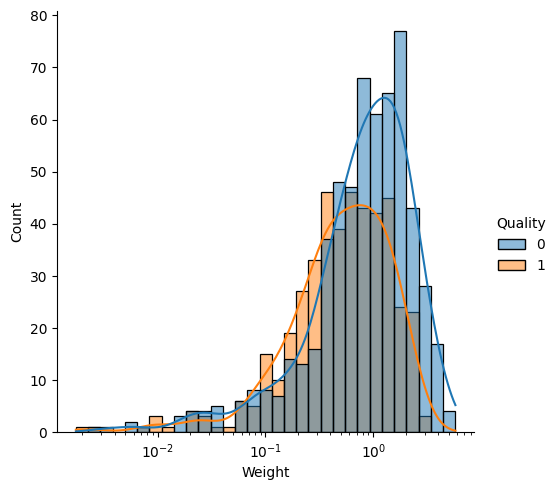

In [ ]:
# Visualize the distribution of Weight feature

sns.displot(data=df, x='Weight', hue='Quality', log_scale=True, kde=True)
plt.show()

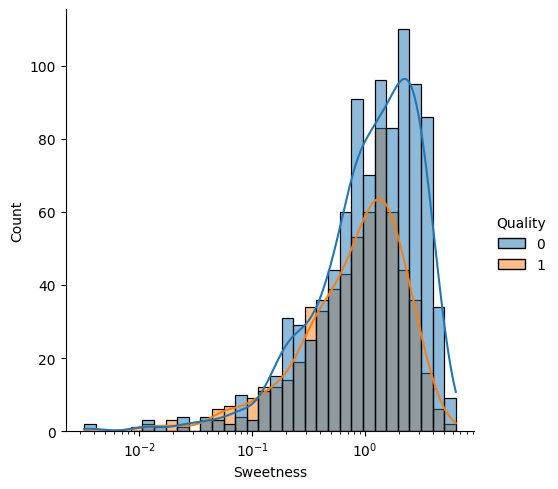

In [ ]:
# Visualize the distribution of sweetness feature

sns.displot(data=df, x='Sweetness', hue='Quality', log_scale=True, kde=True)
plt.show()

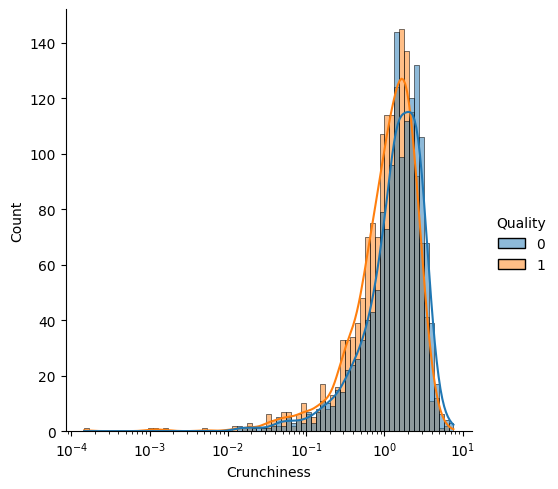

In [ ]:
# Visualize the distribution of crunchiness feature

sns.displot(data=df, x='Crunchiness', hue='Quality', log_scale=True, kde=True)
plt.show()

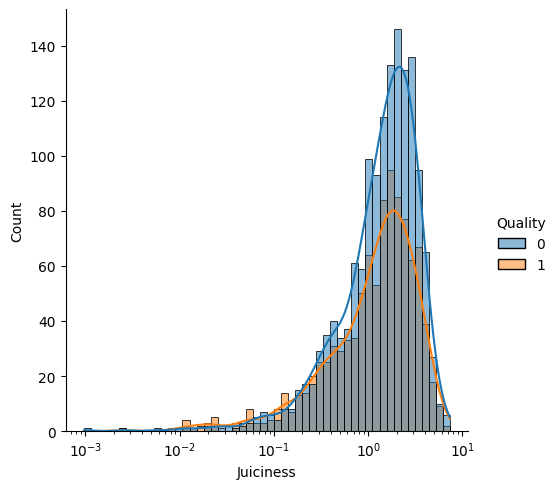

In [ ]:
# Visualize the distribution of juiciness feature

sns.displot(data=df, x='Juiciness', hue='Quality', log_scale=True, kde=True)
plt.show()

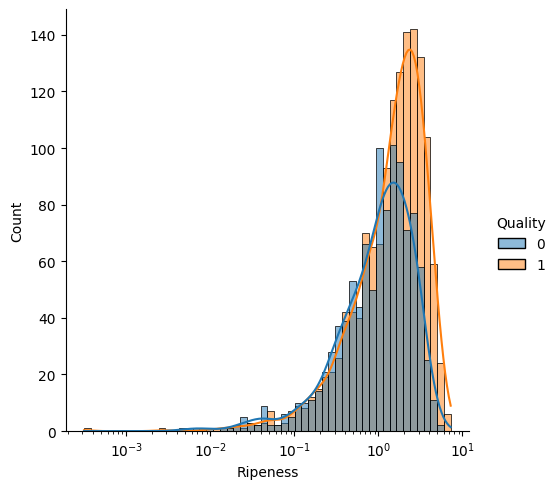

In [ ]:
# Visualize the distribution of ripeness feature

sns.displot(data=df, x='Ripeness', hue='Quality', log_scale=True, kde=True)
plt.show()

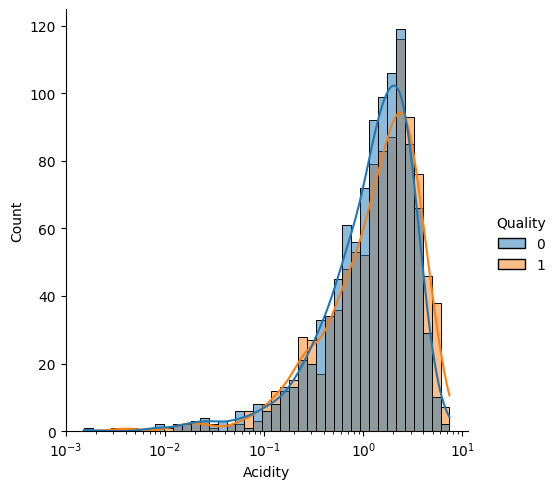

In [ ]:
# Visualize the distribution of acidity feature

sns.displot(data=df, x='Acidity', hue='Quality', log_scale=True, kde=True)
plt.show()

# Feature Engineering

In [ ]:
# Split up categorical and numerical features in different variables

cat_feats = [x for x in df.columns if len(df[x].unique()) <=2]
num_feats = [x for x in df.columns if x not in cat_feats][1:]
print(f'Categorical Features: {cat_feats}\nNumerical Features: {num_feats}')

Categorical Features: ['Quality']
Numerical Features: ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']


In [ ]:
# Standardize numerical features using a standard scaler

ct = make_column_transformer(
    (StandardScaler(), num_feats)
)

df_scaled = pd.DataFrame(ct.fit_transform(df), columns=num_feats)
df_cat_feats = df[cat_feats]

df_concat = pd.concat([df_scaled, df_cat_feats], axis=1)
df_concat.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415,0
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997,0
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044,1
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315,0
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472,0


<b>For anomaly detection, we only need genuine class of the data.</b><br>
Since we want the model to only learn and fit on normal data, we only use the genuine class. This is to ensure that when an abnormal input is given to the model, its reconstruction error will be higher than that of a normal input. For testing of the model, samples from both classes will be used.

In [ ]:
# Extract predictors and labels apart, split up our data into training and test sets with 20 % as a test size and divide genuine and abnormal classes in
# both training and test datasets each in a different variable for later use within training and evaluating phases

X = df_concat.drop(['Quality'], axis=1)
y = df_concat['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

X_train_good = X_train[~y_train]
X_test_good = X_test[~y_test]

X_train_bad = X_train[y_train]
X_test_bad = X_test[y_test]

# Model Building - Autoencoder

## Architecture
* The encoder typically consists of one or more fully connected layers that transform the input data into a lower-dimensional representation. The number of nodes in the hidden layer is typically smaller than the number of nodes in the input and output layers, which forces the network to learn a compressed representation of the input data. The activation function used in the encoder can be any non-linear function, such as a sigmoid or a rectified linear unit (ReLU), which allows the network to capture non-linear relationships in the input data.
* The decoder is typically a mirror image of the encoder, with one or more fully connected layers that transform the compressed representation back into the original input space. The output layer of the decoder should have the same number of nodes as the input layer, so that the decoder can produce a reconstruction of the input data. The activation function used in the decoder is typically the same as the one used in the encoder.

In [ ]:
# Construct our autoencoder architecture from scratch with two steps (Encoder & Decoder)

CODE_DIM = 2
INPUT_SHAPE = X_train.shape[1]

input_layer = Input(shape=(INPUT_SHAPE,))
x = Dense(64, activation='relu')(input_layer)
x = Dense(16, activation='relu')(x)
code = Dense(CODE_DIM, activation='relu')(x)
x = Dense(16, activation='relu')(code)
x = Dense(64, activation='relu')(x)
output_layer = Dense(INPUT_SHAPE, activation='relu')(x)

autoencoder = Model(input_layer, output_layer, name='anomaly')

## Model Callbacks

In [ ]:
# Define a checkpoint and an early stopping callbacks to use in the training process so, our model doesn't have to loop through our data all epochs to
# find the minimum validation loss ever

model_name = "anomaly.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            save_weights_only=True,
                            verbose=1)
earlystopping = EarlyStopping(monitor='val_loss',
                              min_delta = 0,
                              patience = 5,
                              verbose = 1,
                              restore_best_weights=True)

callbacks = [checkpoint, earlystopping]

## Compilation

In [ ]:
# Compile our already built model using Adam as an optimizer and 'Mean-Absolute-Error' as a loss function

autoencoder.compile(loss='mae',
                    optimizer=Adam())

## Training

In [ ]:
# Train our training data with a genuine class and specify number of epochs as 100 & batch size as 32

history = autoencoder.fit(X_train_good, X_train_good,
                          epochs=100, batch_size=32,
                          validation_data=(X_test, X_test),
                          callbacks=callbacks, shuffle=True)

Epoch 1/100
28/51 [===============>..............] - ETA: 0s - loss: 0.5933
Epoch 1: val_loss did not improve from 0.61159
51/51 [==============================] - 0s 5ms/step - loss: 0.5881 - val_loss: 0.6216
Epoch 2/100
43/51 [========================>.....] - ETA: 0s - loss: 0.5853
Epoch 2: val_loss did not improve from 0.61159
51/51 [==============================] - 0s 3ms/step - loss: 0.5880 - val_loss: 0.6218
Epoch 3/100
28/51 [===============>..............] - ETA: 0s - loss: 0.5886
Epoch 3: val_loss did not improve from 0.61159
51/51 [==============================] - 0s 4ms/step - loss: 0.5887 - val_loss: 0.6211
Epoch 4/100
51/51 [==============================] - ETA: 0s - loss: 0.5886
Epoch 4: val_loss did not improve from 0.61159
51/51 [==============================] - 0s 4ms/step - loss: 0.5886 - val_loss: 0.6219
Epoch 5/100
28/51 [===============>..............] - ETA: 0s - loss: 0.5925
Epoch 5: val_loss did not improve from 0.61159
51/51 [==============================

## Results

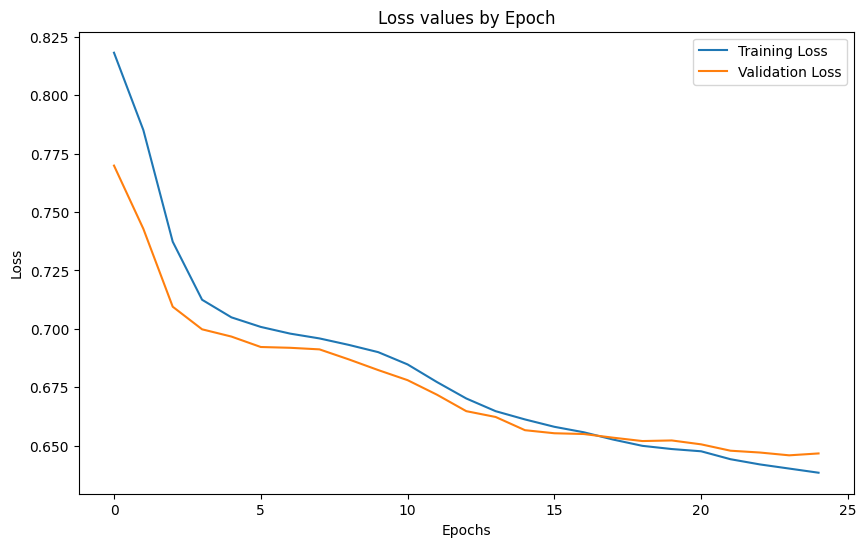

In [ ]:
# Visualize the variability of training and testing loss by number of epochs

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss values by Epoch")
plt.show()

# Reconstruction

We will start by making a prediction on the test set which consists of both classes. After this, we can define a threshold and a metric, depending upon the need. The idea is simple:
* If the Reconstruction error is lower than the threshold, the sample is good.
* If the Reconstruction error is higher than the threshold, the sample is bad.

This is because the model was trained with samples of genuine class, so anything outside of this threshold is considered an anomaly.

In [ ]:
# Make predictions on the test set with both classes and calculate its error using Mean Squared Error metric

reconstructions = autoencoder.predict(X_test, verbose=0)
reconstruction_error = mae(reconstructions, X_test)

In [ ]:
# Create a Dataframe with reconstruction error and true labels

recons_df = pd.DataFrame({
    'error': reconstruction_error,
    'y_true': y_test
}).reset_index(drop=True)
recons_df.head()

,error,y_true
0,1.061546,False
1,1.100386,True
2,0.671119,True
3,0.778363,True
4,1.074706,False


## Finding the Ideal Threshold

Choosing the right threshold is crucial in anomaly detection with autoencoders because it determines the tradeoff between detecting anomalies and generating false positives. The threshold determines the cutoff point for the reconstruction error, above which a data point is classified as anomalous. If the threshold is set too low, the autoencoder will classify many normal data points as anomalies, resulting in a high false positive rate. On the other hand, if the threshold is set too high, the autoencoder may miss some true anomalies, resulting in a high false negative rate.

The metric we will choose for this problem is Recall, as we want to reduce False Negatives. Any Fraud apple classified as Genuine may lead to unnoticed problems in the stomach, since there will never be anomaly detected. To find the right threshold value, several values will be tested to find the best combination of metrics. While our goal is to improve Recall, we will also keep track of the accuracy. The tested values will be percentiles of the reconstruction error values.

In [ ]:
# Define a function that tries out a huge set of values to find the ideal threshold that maximizes performance metrics especially Recall

def thresholdTuning(df, iterations):

    thresh_df = {
        'threshold': [],
        'accuracy': [],
        'precision': [],
        'recall': []
    }

    for i in range(iterations):
        thresh_value = df['error'].quantile(i/iterations)
        preds = df['error'] > thresh_value
        cr = classification_report(df['y_true'], preds, output_dict=True)
        acc = cr['accuracy']
        prec = cr['macro avg']['precision']
        rc = cr['macro avg']['recall']

        thresh_df['threshold'].append(thresh_value)
        thresh_df['accuracy'].append(acc)
        thresh_df['precision'].append(prec)
        thresh_df['recall'].append(rc)

        print(f"Threshold: {thresh_value:.4f}\tAccuracy: {acc:.3f}\t\tPrecision: {prec:.3f}\tRecall Score: {rc:.3f}")

    return pd.DataFrame(thresh_df)

thresh_df = thresholdTuning(recons_df, 10)

Threshold: 0.1225	Accuracy: 0.509		Precision: 0.754	Recall Score: 0.501
Threshold: 0.3468	Accuracy: 0.502		Precision: 0.490	Recall Score: 0.496
Threshold: 0.4187	Accuracy: 0.502		Precision: 0.497	Recall Score: 0.498
Threshold: 0.4879	Accuracy: 0.507		Precision: 0.505	Recall Score: 0.505
Threshold: 0.5536	Accuracy: 0.527		Precision: 0.527	Recall Score: 0.526
Threshold: 0.6228	Accuracy: 0.527		Precision: 0.528	Recall Score: 0.528
Threshold: 0.6874	Accuracy: 0.517		Precision: 0.520	Recall Score: 0.519
Threshold: 0.7595	Accuracy: 0.545		Precision: 0.557	Recall Score: 0.548
Threshold: 0.8418	Accuracy: 0.542		Precision: 0.573	Recall Score: 0.547
Threshold: 0.9765	Accuracy: 0.535		Precision: 0.614	Recall Score: 0.541


In [ ]:
# Extract the best threshold that provide the maximum recall metric value

threshold = thresh_df[thresh_df['recall'] == thresh_df['recall'].max()]['threshold'].values[0]
print(f"Threshold with Maximum Recall: {threshold:.6f}")

Threshold with Maximum Recall: 0.759519


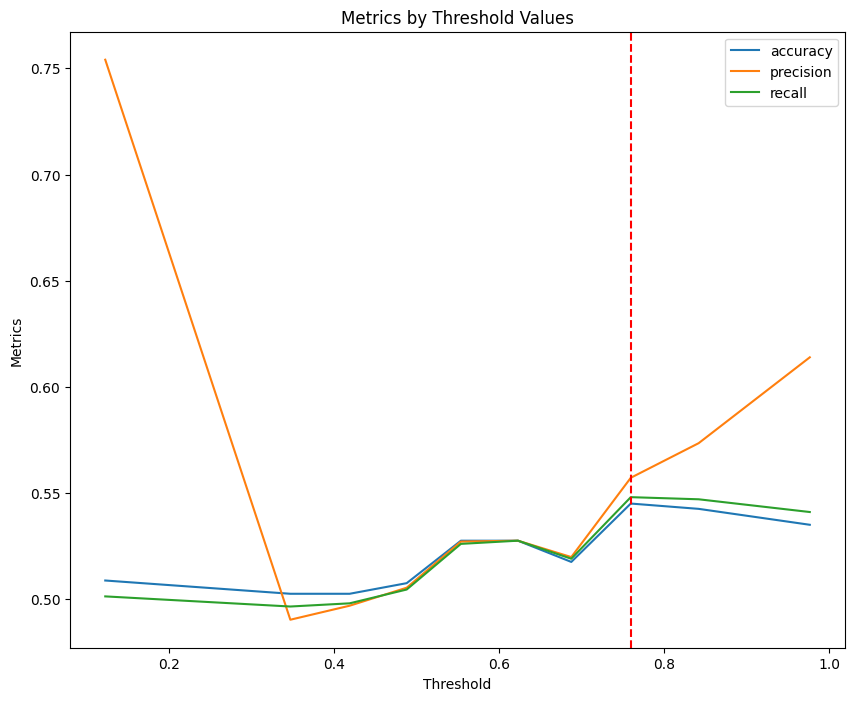

In [ ]:
# Visualize the distribution of accuracy, precision & recall accorading to threshold values

plt.figure(figsize=(10,8))
plt.plot(thresh_df['threshold'], thresh_df['accuracy'], label='accuracy')
plt.plot(thresh_df['threshold'], thresh_df['precision'], label='precision')
plt.plot(thresh_df['threshold'], thresh_df['recall'], label='recall')
plt.axvline(x=threshold, color='r', linestyle='dashed')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Metrics by Threshold Values')
plt.legend()
plt.show()

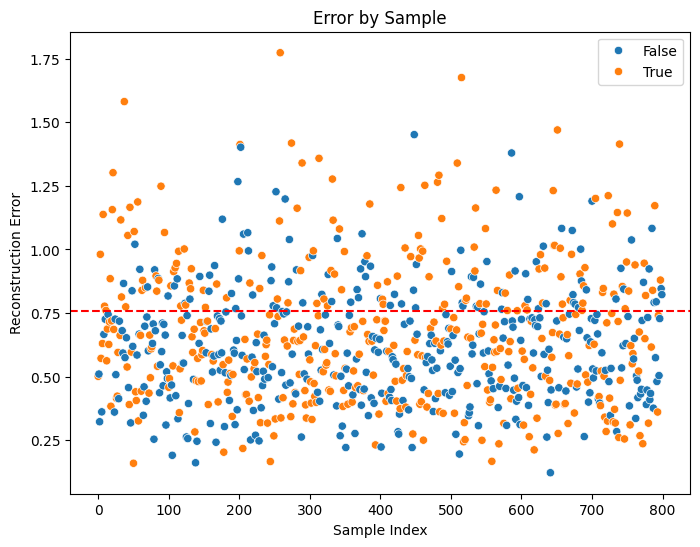

In [ ]:
# Create a Scatter plot that illustrates the variation of reconstruction error by sample index

temp = recons_df.sample(frac=1, random_state=42).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.scatterplot(data=temp, x=temp.index, y='error', hue='y_true')
plt.axhline(y=threshold, color='r', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Error by Sample')
plt.legend()
plt.show()

# Classification

In [ ]:
# Make predictions on the test set according to the chosen threshold

recons_df['y_pred'] = recons_df['error'] > threshold
recons_df.head()

,error,y_true,y_pred
0,1.061546,False,True
1,1.100386,True,True
2,0.671119,True,False
3,0.778363,True,True
4,1.074706,False,True


In [ ]:
# Evaluate our model by printing out a classification report that summarizes all metrics available

print(classification_report(recons_df['y_true'],recons_df['y_pred']))

              precision    recall  f1-score   support

       False       0.53      0.75      0.62       394
        True       0.59      0.35      0.44       406

    accuracy                           0.55       800
   macro avg       0.56      0.55      0.53       800
weighted avg       0.56      0.55      0.53       800



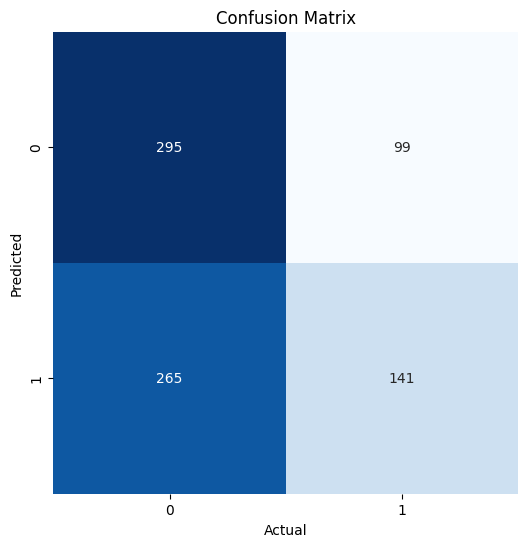

In [ ]:
# Creating a plot that describes the confusion matrix and the number of tp, fp, tn, fn

cm = confusion_matrix(recons_df['y_true'],recons_df['y_pred'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='.6g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Results

In [ ]:
# Printing out our model's final performance in the format of accuracy and recall

print(f"Recall Score: {recall_score(recons_df['y_true'],recons_df['y_pred'])*100:.3f}%")
print(f"Accuracy Score: {accuracy_score(recons_df['y_true'],recons_df['y_pred'])*100:.3f}%")

Recall Score: 34.729%
Accuracy Score: 54.500%
